#### Nome: Ozeas dos Santos Nascimento 
## Saúde

Uma operadora de seguro de saúde sabe da forte influência do peso, gênero e nível de colesterol no desenvolvimento de doenças cardíacas. O objetivo dessa atividade é identificar perfis de indivíduos com maior risco para sobrepeso e colesterol alto.

Para alcançar este objetivo, iremos utilizar o modelo agrupamento pelo algoritmo das K-Means. Então nosso objetivo se torna encontrar grupos de indivíduos (clusters) e definir os limites entre o grupo saudável e o grupo de risco.

Utilizando a K-means, realizarei a clustrização com k=2. Descrevendo os dois grupos gerados diferenciando os dois grupos de risco.

Tentarei encontrar 4 grupos distintos: Alto risco, possui colesterol e peso altos; baixo risco, possui colesterol e peso baixos; e risco moderado possui apenas o peso ou apenas o colesterol altos. Verifique os resultados. Investigue quais são os limites de peso e de colesterol para que um indivíduo seja considerado paciente de risco.


### INFORMAÇÕES BASE DE DADOS
||| Peso = Peso do paciente ||| 
Colesterol = Taxa de Colesterol do Paciente |||
Genero = 1 para Masculino, 0 para Feminino

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans  #Biblioteca utilizada para a construção do K-means

In [2]:
df_saude = pd.read_excel("Saude.xlsx")
df_saude.head()

,Peso,Colesterol,Genero
0,102,111,1
1,115,135,1
2,115,136,1
3,140,167,0
4,130,158,1


#### df_saude.info() ==> Nos informa que temos o total de 547 registros, sem valores nulos ou faltantes, e as 3 colunas possuem o mesmo Dtype (int64)

In [3]:
df_saude.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Peso        547 non-null    int64
 1   Colesterol  547 non-null    int64
 2   Genero      547 non-null    int64
dtypes: int64(3)
memory usage: 12.9 KB


#### O peso medio registrado em nossa base é de 143,57, Colesterol em 170.43.

In [4]:
df_saude.describe()

,Peso,Colesterol,Genero
count,547.000000,547.000000,547.000000
mean,143.572212,170.433272,0.513711
std,30.837275,39.147189,0.500269
min,95.000000,102.000000,0.000000
25%,116.000000,136.000000,0.000000
50%,140.000000,169.000000,1.000000
75%,171.000000,208.000000,1.000000
max,203.000000,235.000000,1.000000


#### Verificando a existencia de outliers


Não foi detectado a presença de outliers


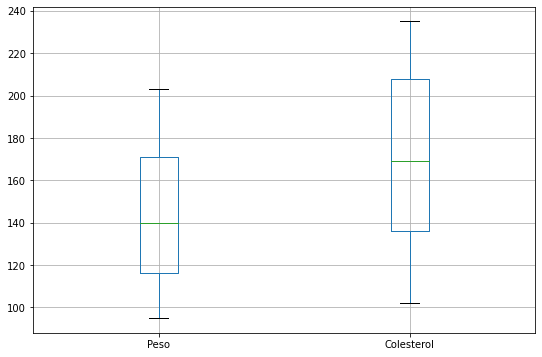

In [5]:
plt.rcParams["figure.figsize"] = [9,6]
boxplot = df_saude.boxplot(column=['Peso','Colesterol'])
print("Não foi detectado a presença de outliers")

#### Distribuição dos pacientes

##### Pode-se observar no grafico abaixo, uma correlação positiva entre o peso e o colesterol, indicando que quanto maior o peso do paciente, maior será sua taxa de colesterol;

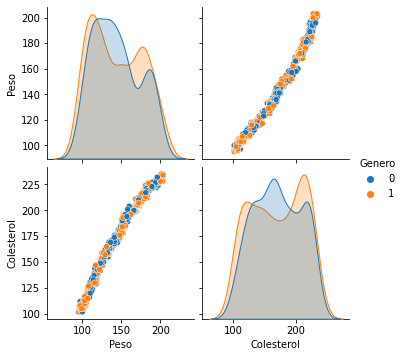

In [6]:
sns.pairplot(df_saude, hue= "Genero")
plt.show()

Text(0.5, 1.0, 'Distribuição dos generos dos pacientes')

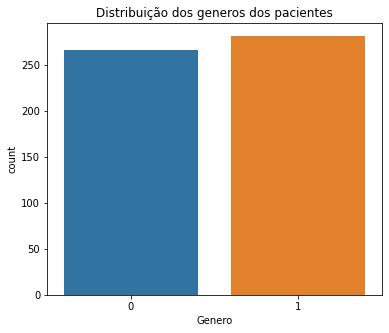

In [7]:
plt.rcParams['figure.figsize'] = [6,5]
sns.countplot(x='Genero', data = df_saude)
plt.title('Distribuição dos generos dos pacientes')

In [8]:
masc = df_saude.loc[df_saude['Genero'] == 1].count()
fem = df_saude.loc[df_saude['Genero'] == 0].count()

In [9]:
print(f"total genero masculino (1): ",masc, "total genero Feminino (0): ",fem)

total genero masculino (1):  Peso          281
Colesterol    281
Genero        281
dtype: int64 total genero Feminino (0):  Peso          266
Colesterol    266
Genero        266
dtype: int64


#### Para este trabalho, utilizaremos o número de clusters igual a 2 (k=2). Porém, caso não soubessimos a quantidade de clusters a utilizar, poderiamos utilizar o "grafico de cotovelo" para encontrar o número ideal de clusters a ser utilizado.

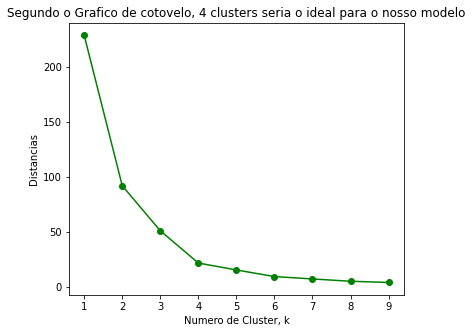

In [10]:

from sklearn.preprocessing import MinMaxScaler


normaliza = MinMaxScaler()
X_std = normaliza.fit_transform(df_saude)

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters = k, max_iter=200, random_state=150).fit(X_std)

    inertias.append(model.inertia_)

plt.plot(ks,inertias, '-o', color = 'green')
plt.xlabel('Numero de Cluster, k')
plt.ylabel('Distancias')
plt.title('Segundo o Grafico de cotovelo, 4 clusters seria o ideal para o nosso modelo')
plt.xticks(ks)
plt.show()

    

##### Segundo o grafico de cotovelo, o ideal seria utilizar 4 clusters; porém atendo-se ao enunciado, seguiremos com 2 clusters para separação dos dados.

### Aplicando o Kmeans

In [11]:
df_saude_normalizado = pd.DataFrame(X_std,columns=['Peso','Colesterol','Genero'])

In [12]:
km = KMeans(n_clusters=2, max_iter=600, random_state=170)
y_pred = km.fit_predict(df_saude_normalizado)
df_saude_normalizado['Cluster'] = y_pred
df_saude_normalizado

,Peso,Colesterol,Genero,Cluster
0,0.064815,0.067669,1.0,0
1,0.185185,0.248120,1.0,0
2,0.185185,0.255639,1.0,0
3,0.416667,0.488722,0.0,1
4,0.324074,0.421053,1.0,0
...,...,...,...,...
542,0.712963,0.789474,1.0,0
543,0.314815,0.413534,1.0,0
544,0.111111,0.097744,1.0,0
545,0.203704,0.338346,1.0,0


In [13]:
#Lista Cluster
print(y_pred)

[0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1
 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 1
 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1
 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0
 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1
 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0
 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1
 0 0 1 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1
 1 0 1 0 1 1 1 0 0 0 0 0 

### Identificando a diferença entre cada grupo

In [14]:
retorno = normaliza.inverse_transform(X_std)

In [15]:
retorno

array([[102., 111.,   1.],
       [115., 135.,   1.],
       [115., 136.,   1.],
       ...,
       [107., 115.,   1.],
       [117., 147.,   1.],
       [148., 176.,   1.]])

In [16]:
df_saude = pd.DataFrame(retorno, columns=['Peso','Colesterol', 'Genero'])
df_saude['Clusters'] = y_pred

In [17]:
df_saude

,Peso,Colesterol,Genero,Clusters
0,102.0,111.0,1.0,0
1,115.0,135.0,1.0,0
2,115.0,136.0,1.0,0
3,140.0,167.0,0.0,1
4,130.0,158.0,1.0,0
...,...,...,...,...
542,172.0,207.0,1.0,0
543,129.0,157.0,1.0,0
544,107.0,115.0,1.0,0
545,117.0,147.0,1.0,0


In [18]:
 #Verificando se existe alguém do genero Feminino (0) no cluster 0.
cluster_0 = df_saude.loc[(df_saude['Clusters']==0)]
cluster_0.loc[(cluster_0['Genero']==0)]

,Peso,Colesterol,Genero,Clusters


In [19]:
 #Verificando se existe alguém do genero Masculino (1) no cluster 1.
cluster_1 = df_saude.loc[df_saude['Clusters']==1]
cluster_1.loc[cluster_1['Genero']==1]   

,Peso,Colesterol,Genero,Clusters


### Analise:
#### Segundo os dados gerados pelo K-means, sendo k=2, pacientes do genero masculino (cluster 0) com peso superior a media de 142kg e com colesterol acima de 172 são considerados de alto risco. Pacientes masculinos com o peso próximos a 95Kg (abaixo da média), podem ser considerados de baixo risco, com a taxa de Colesterol próxima a 102.
#### Já pacientes do genero feminino (cluster 1), possuem menor risco se abaixo da média de peso de 140Kg e taxa de colesterol abaixo de 169. Acima deste, o mesmo pode ser considerado de alto risco, por estarem acima da média

### Entre os 2 grupos, existe pouca diferença entre os valores, podendo indicar que o genero do paciente não interfere diretamente no resultado da analise.

In [20]:
df_saude.groupby('Clusters').agg({'Genero':['mean'],'Peso':['median','min','mean','max'],'Colesterol':['median','min','mean','max']})

Genero   Peso                          Colesterol                     \
           mean median   min        mean    max     median    min        mean   
Clusters                                                                        
0           1.0  142.0  95.0  143.765125  203.0      172.0  102.0  170.032028   
1           0.0  140.0  96.0  143.368421  203.0      169.0  102.0  170.857143   

                 
            max  
Clusters         
0         235.0  
1         235.0

## Identificando os generos de pacientes presentes em cada grupo

### Pacientes Masculinos do Cluster0

In [21]:
df_saude[df_saude['Clusters']==0]

,Peso,Colesterol,Genero,Clusters
0,102.0,111.0,1.0,0
1,115.0,135.0,1.0,0
2,115.0,136.0,1.0,0
4,130.0,158.0,1.0,0
5,198.0,227.0,1.0,0
...,...,...,...,...
542,172.0,207.0,1.0,0
543,129.0,157.0,1.0,0
544,107.0,115.0,1.0,0
545,117.0,147.0,1.0,0


### Pacientes Femininos do Cluster 1

In [22]:
df_saude[df_saude['Clusters']==1]

,Peso,Colesterol,Genero,Clusters
3,140.0,167.0,0.0,1
7,145.0,176.0,0.0,1
8,191.0,223.0,0.0,1
10,104.0,116.0,0.0,1
12,96.0,102.0,0.0,1
...,...,...,...,...
536,127.0,150.0,0.0,1
537,189.0,223.0,0.0,1
538,114.0,133.0,0.0,1
539,125.0,149.0,0.0,1
